# Построение и анализ моделей беспроводных сетей 5G/6G
## Практическая работа №2
### SNR и емкость канала

Быстров Глеб Андреевич
НФИмд-01-24
1132249517

**Отношение SNR**

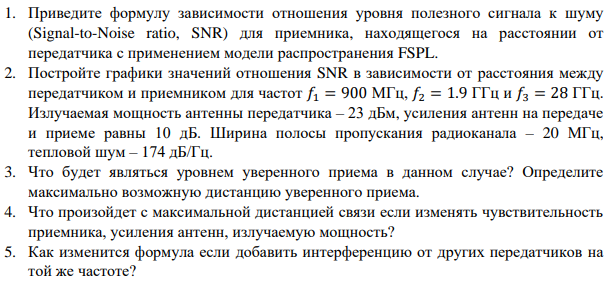

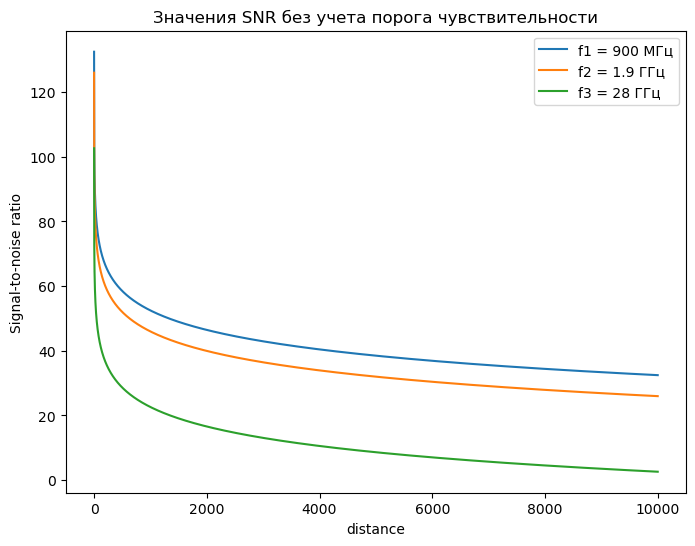

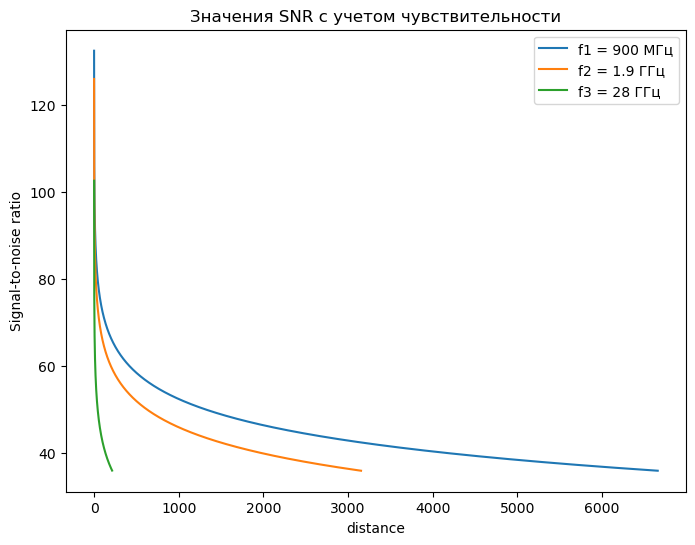

In [151]:
import numpy as np
import math
from scipy.constants import speed_of_light as c
import matplotlib.pyplot as plt

def log(value):
    return 10 * np.log10(value)

def lin(value):
    return np.power(10, value / 10)

def fspl(d, f, h_bs, h_ut):
    loss = np.power((4*np.pi*d*f)/c, 2)
    loss = log(loss)
    return loss

def prd(G_r, G_t, P_t, d, f, N_0, B, loss=fspl,  h_bs=None, h_ut=None):
    power_on_reciever = log(lin(P_t) * G_t * G_r) - loss(d, f, h_bs, h_ut) 
    snr = power_on_reciever - log(B*lin(N_0)) 
    return power_on_reciever, snr

P_t = 23 # мощность передатчика
G_t, G_r = 10, 10 # усиление
N_0 = -174 # шум
B = 20*(10**6) # полоса частот
f = np.array([900*(10**6), 1.9*(10**9), 28*(10**9)]) # частоты
d = np.linspace(0.1, 10000, 100*100) # расстояние

pwr_900, snr_900 = prd(G_r, G_t, P_t, d, f[0], N_0, B)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d, f[1], N_0, B)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d, f[2], N_0, B)

d_snr_900_filtered = []
snr_900_filtered = []

d_snr_1900_filtered = []
snr_1900_filtered = []

d_snr_28000_filtered = []
snr_28000_filtered = []

filt = -65

for i in range(len(pwr_900)):
    if pwr_900[i] > filt:
        snr_900_filtered.append(snr_900[i])
        d_snr_900_filtered.append(d[i])
    if pwr_1900[i] > filt:
        snr_1900_filtered.append(snr_1900[i])
        d_snr_1900_filtered.append(d[i])
    if pwr_28000[i] > filt:
        snr_28000_filtered.append(snr_28000[i])
        d_snr_28000_filtered.append(d[i])

plt.figure(figsize=(8,6))
plt.plot(d, snr_900, label='f1 = 900 МГц')
plt.plot(d, snr_1900, label='f2 = 1.9 ГГц')
plt.plot(d, snr_28000, label='f3 = 28 ГГц')
plt.title("Значения SNR без учета порога чувствительности")
plt.xlabel('distance')
plt.ylabel('Signal-to-noise ratio')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(d_snr_900_filtered, snr_900_filtered, label='f1 = 900 МГц')
plt.plot(d_snr_1900_filtered, snr_1900_filtered, label='f2 = 1.9 ГГц')
plt.plot(d_snr_28000_filtered, snr_28000_filtered, label='f3 = 28 ГГц')
plt.title("Значения SNR с учетом чувствительности")
plt.xlabel('distance')
plt.ylabel('Signal-to-noise ratio')
plt.legend()
plt.show()

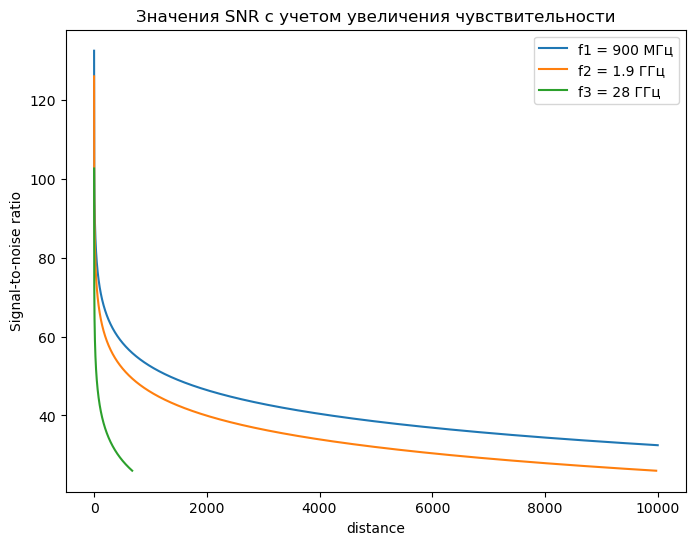

In [152]:
d_snr_900_filtered = []
snr_900_filtered = []

d_snr_1900_filtered = []
snr_1900_filtered = []

d_snr_28000_filtered = []
snr_28000_filtered = []

filt = -75

for i in range(len(pwr_900)):
    if pwr_900[i] > filt:
        snr_900_filtered.append(snr_900[i])
        d_snr_900_filtered.append(d[i])
    if pwr_1900[i] > filt:
        snr_1900_filtered.append(snr_1900[i])
        d_snr_1900_filtered.append(d[i])
    if pwr_28000[i] > filt:
        snr_28000_filtered.append(snr_28000[i])
        d_snr_28000_filtered.append(d[i])
        
plt.figure(figsize=(8,6))
plt.plot(d_snr_900_filtered, snr_900_filtered, label='f1 = 900 МГц')
plt.plot(d_snr_1900_filtered, snr_1900_filtered, label='f2 = 1.9 ГГц')
plt.plot(d_snr_28000_filtered, snr_28000_filtered, label='f3 = 28 ГГц')
plt.title("Значения SNR с учетом увеличения чувствительности")
plt.xlabel('distance')
plt.ylabel('Signal-to-noise ratio')
plt.legend()
plt.show()

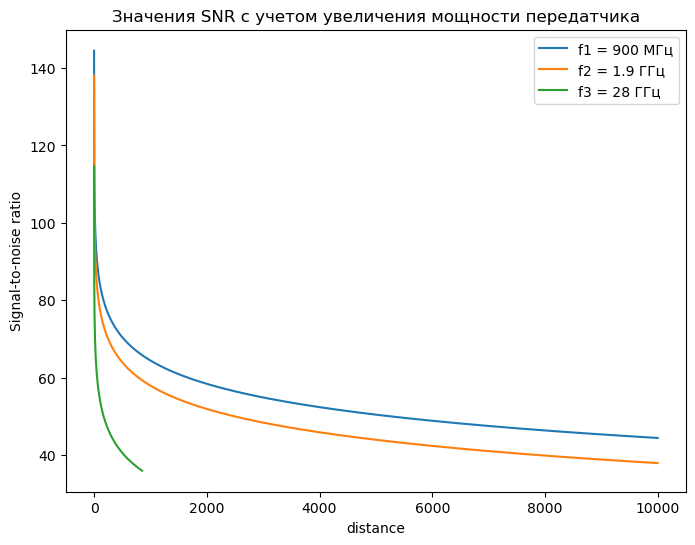

In [153]:
P_t = 35 # мощность передатчика
G_t, G_r = 10, 10 # усиление 
N_0 = -174 # шум 
B = 20*(10**6) # полоса частот
d = np.linspace(0.1, 10000, 100*100) # расстояние

pwr_900, snr_900 = prd(G_r, G_t, P_t, d, f[0], N_0, B)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d, f[1], N_0, B)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d, f[2], N_0, B)

d_snr_900_filtered = []
snr_900_filtered = []

d_snr_1900_filtered = []
snr_1900_filtered = []

d_snr_28000_filtered = []
snr_28000_filtered = []

filt = -65

for i in range(len(pwr_900)):
    if pwr_900[i] > filt:
        snr_900_filtered.append(snr_900[i])
        d_snr_900_filtered.append(d[i])
    if pwr_1900[i] > filt:
        snr_1900_filtered.append(snr_1900[i])
        d_snr_1900_filtered.append(d[i])
    if pwr_28000[i] > filt:
        snr_28000_filtered.append(snr_28000[i])
        d_snr_28000_filtered.append(d[i])
        
plt.figure(figsize=(8,6))
plt.plot(d_snr_900_filtered, snr_900_filtered, label='f1 = 900 МГц')
plt.plot(d_snr_1900_filtered, snr_1900_filtered, label='f2 = 1.9 ГГц')
plt.plot(d_snr_28000_filtered, snr_28000_filtered, label='f3 = 28 ГГц')
plt.title("Значения SNR с учетом увеличения мощности передатчика")
plt.xlabel('distance')
plt.ylabel('Signal-to-noise ratio')
plt.legend()
plt.show()

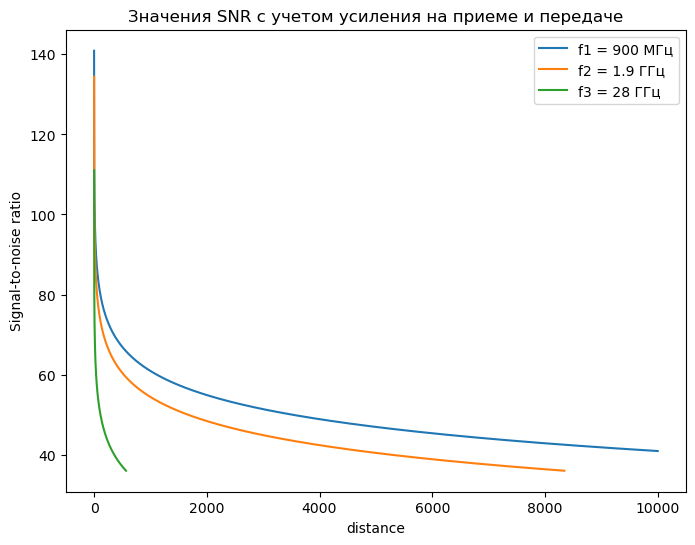

In [154]:
P_t = 23 # мощность  передатчика
G_t, G_r = 35, 20 # усиление 
N_0 = -174 # шум
B = 20*(10**6) # полоса частот
d = np.linspace(0.1, 10000, 100*100) # расстояние

pwr_900, snr_900 = prd(G_r, G_t, P_t, d, f[0], N_0, B)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d, f[1], N_0, B)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d, f[2], N_0, B)

d_snr_900_filtered = []
snr_900_filtered = []

d_snr_1900_filtered = []
snr_1900_filtered = []

d_snr_28000_filtered = []
snr_28000_filtered = []

filt = -65

for i in range(len(pwr_900)):
    if pwr_900[i] > filt:
        snr_900_filtered.append(snr_900[i])
        d_snr_900_filtered.append(d[i])
    if pwr_1900[i] > filt:
        snr_1900_filtered.append(snr_1900[i])
        d_snr_1900_filtered.append(d[i])
    if pwr_28000[i] > filt:
        snr_28000_filtered.append(snr_28000[i])
        d_snr_28000_filtered.append(d[i])
        
plt.figure(figsize=(8,6))
plt.plot(d_snr_900_filtered, snr_900_filtered, label='f1 = 900 МГц')
plt.plot(d_snr_1900_filtered, snr_1900_filtered, label='f2 = 1.9 ГГц')
plt.plot(d_snr_28000_filtered, snr_28000_filtered, label='f3 = 28 ГГц')
plt.title("Значения SNR с учетом усиления на приеме и передаче")
plt.xlabel('distance')
plt.ylabel('Signal-to-noise ratio')
plt.legend()
plt.show()

**Скорость по Шеннону**

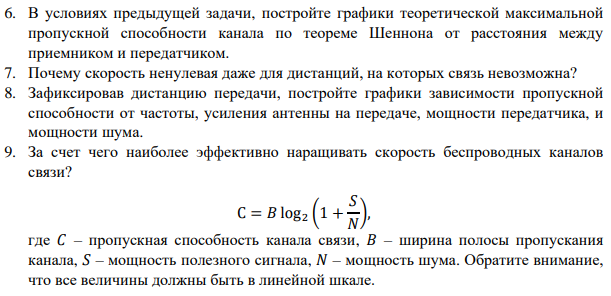

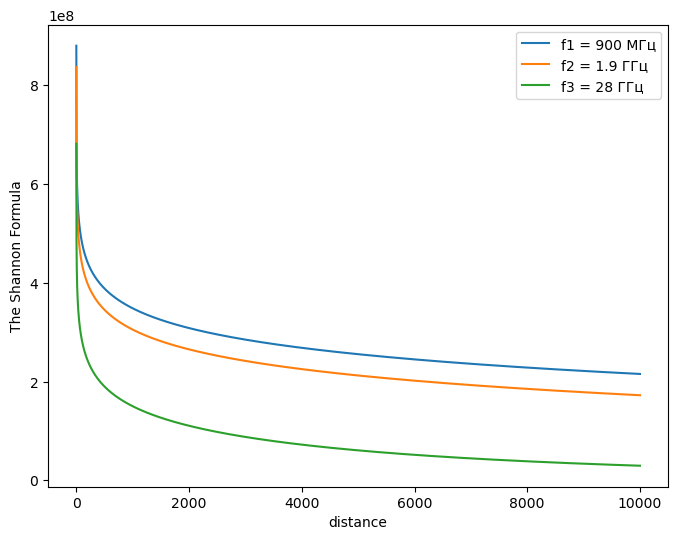

In [155]:
def shennon(snr, B):
    return B*np.log2(1 + snr)

P_t = 23 # мощность передатчика
G_t, G_r = 10, 10 # усиление
N_0 = -174 # шум
B = 20*(10**6) # полоса частот
d = np.linspace(0.1, 10000, 100*100) # расстояние

pwr_900, snr_900 = prd(G_r, G_t, P_t, d, f[0], N_0, B)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d, f[1], N_0, B)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d, f[2], N_0, B)

shennon_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(d, shennon_900, label='f1 = 900 МГц')
plt.plot(d, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(d, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('distance')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()

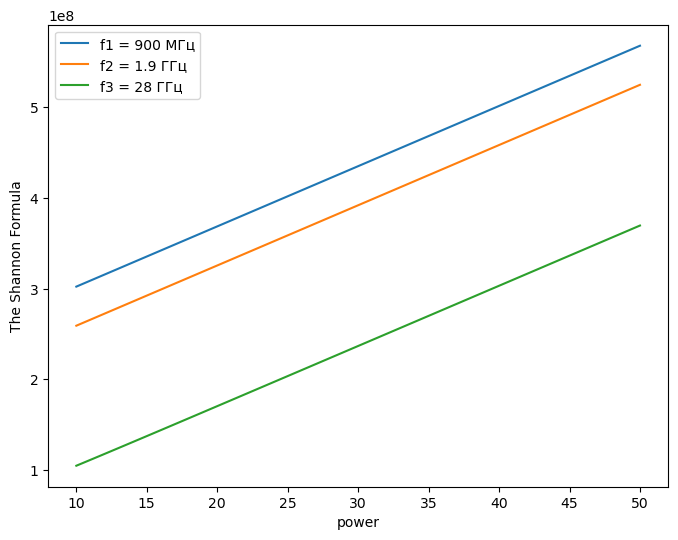

In [156]:
P_t = np.linspace(10, 50, 100) # мощность
G_t, G_r = 10, 10 # усиление
N_0 = -174 # шум
B = 20*(10**6) # полоса частот
d = 500

pwr_900, snr_900 = prd(G_r, G_t, P_t, d, f[0], N_0, B)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d, f[1], N_0, B)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d, f[2], N_0, B)

shennon_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(P_t, shennon_900, label='f1 = 900 МГц')
plt.plot(P_t, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(P_t, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('power')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()

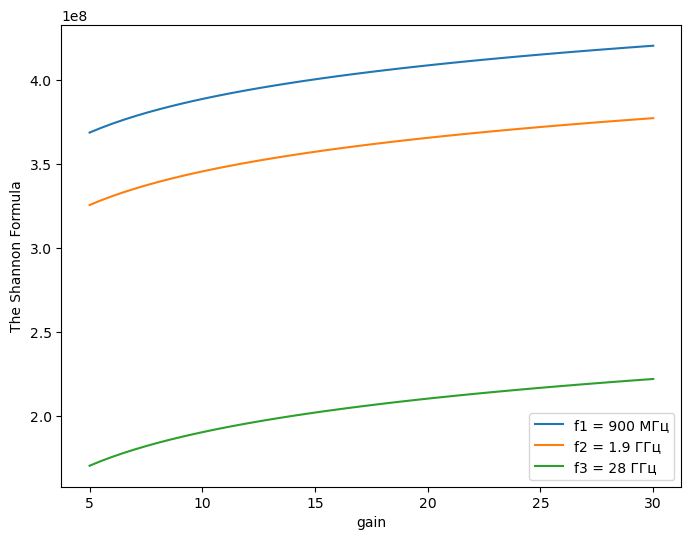

In [157]:
P_t = 23 # мощность
G_t, G_r = np.linspace(5, 30, 50), 10 # усиление 
N_0 = -174 # шум 
B = 20*(10**6) # полоса частот
d = 500

pwr_900, snr_900 = prd(G_r, G_t, P_t, d, f[0], N_0, B)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d, f[1], N_0, B)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d, f[2], N_0, B)

shennon_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(G_t, shennon_900, label='f1 = 900 МГц')
plt.plot(G_t, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(G_t, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('gain')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()

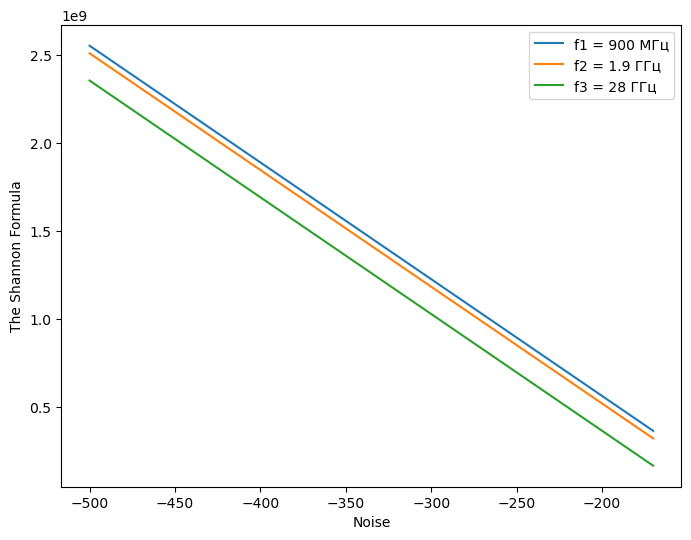

In [158]:
P_t = 23 # мощность 
G_t, G_r = 10, 10 # усиление 
N_0 = np.linspace(170, 500, 50) # шум 
N_0 = -1*N_0
B = 20*(10**6) # полоса частот
d = 500

pwr_900, snr_900 = prd(G_r, G_t, P_t, d, f[0], N_0, B)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d, f[1], N_0, B)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d, f[2], N_0, B)

shennon_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(N_0, shennon_900, label='f1 = 900 МГц')
plt.plot(N_0, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(N_0, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('Noise')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()

**Стандартные модели распространения 3GPP**

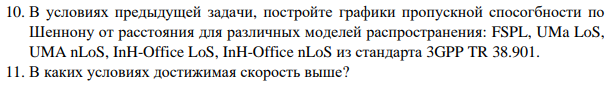

UMa LoS

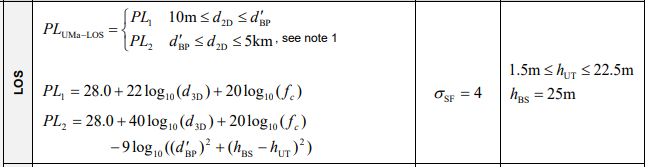

UMA nLoS

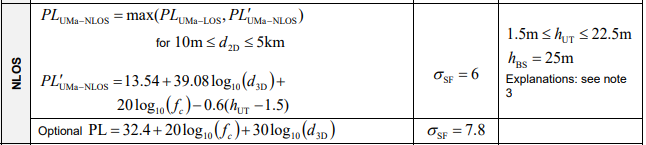

InH-Office LoS

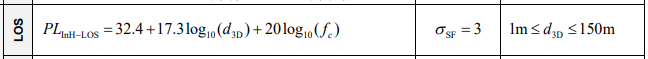

InH-Office nLoS

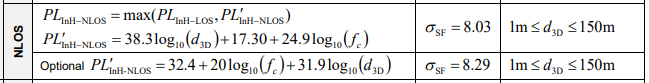

In [159]:
def d_2D_3D(d_2D, h_bs, h_ut):
    return np.sqrt(np.power(d_2D, 2) + np.power(h_bs - h_ut, 2))

def d_3D_2D(d_3D, h_bs, h_ut):
    return np.sqrt(np.power(d_3D, 2) - np.power(h_bs - h_ut, 2))

def uma_los(d_2D, f, h_bs, h_ut):
    def pl_choose(d_2, d_BP, d_3, f):
        if d_2 <= d_BP:
            return 28.0 + 22*np.log10(d_3) + 20*np.log10(f)
        else:
            return 28.0 + 40*np.log10(d_3) + 20*np.log10(f) - 9*np.log10(np.power(d_BP, 2) + np.power(h_bs - h_ut, 2))

    d_3D = d_2D_3D(d_2D, h_bs, h_ut)
    d_BP = 4 * (h_bs - 1) * (h_ut -1) * f / c
    path_loss = np.array([ pl_choose(d_[0], d_BP, d_[1], f) for d_ in zip(d_2D, d_3D)])
    
    return path_loss

def uma_nlos(d_2D, f, h_bs, h_ut):
    d_3D = d_2D_3D(d_2D, h_bs, h_ut)
    uma_nlos_ = 13.54 + 39.08*np.log10(d_3D) + 20*np.log10(f) - 0.6*np.log10(h_ut - 1.5)
    uma_los_ = uma_los(d_2D, f, h_bs, h_ut)
    path_loss = np.array([max(u[0], u[1]) for u in zip(uma_los_, uma_nlos_)])
    
    return path_loss

def inh_los(d_2D, f, h_bs, h_ut):
    d_3D = d_2D_3D(d_2D, h_bs, h_ut)
    path_loss = 32.4 + 17.3*np.log10(d_3D) + 20*np.log10(f)
    
    return path_loss

def inh_nlos(d_2D, f, h_bs, h_ut):
    d_3D = d_2D_3D(d_2D, h_bs, h_ut)
    inh_nlos_ = 38.3*np.log10(d_3D) + 17.30 + 20*np.log10(f)
    inh_los_ = inh_los(d_2D, f, h_bs, h_ut)
    path_loss = np.array([max(i[0], i[1]) for i in zip(inh_los_, inh_nlos_)])
    
    return path_loss

d_uma = np.linspace(10, 5000, 10000)
h_ut_uma = 12
h_bs_uma = 25

h_ut_inh = 1
h_bs_inh = 3
d_2D_max = d_3D_2D(150, h_bs_inh, h_ut_inh)
d_inh = np.linspace(0, d_2D_max, 10000)

P_t = 23 # мощность передатчика
G_t, G_r = 10, 10 # усиление 
N_0 = -174 # шум
B = 20*(10**6) # полоса частот

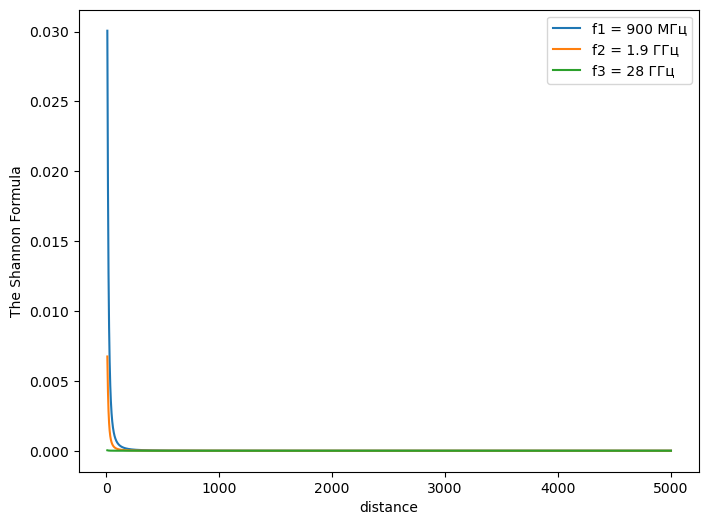

In [160]:
pwr_900, snr_900 = prd(G_r, G_t, P_t, d_uma, f[0], N_0, B, loss=uma_los, h_bs=h_bs_uma, h_ut=h_ut_uma)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d_uma, f[1], N_0, B, loss=uma_los, h_bs=h_bs_uma, h_ut=h_ut_uma)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d_uma, f[2], N_0, B, loss=uma_los, h_bs=h_bs_uma, h_ut=h_ut_uma)

shennon_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(d_uma, shennon_900, label='f1 = 900 МГц')
plt.plot(d_uma, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(d_uma, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('distance')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()

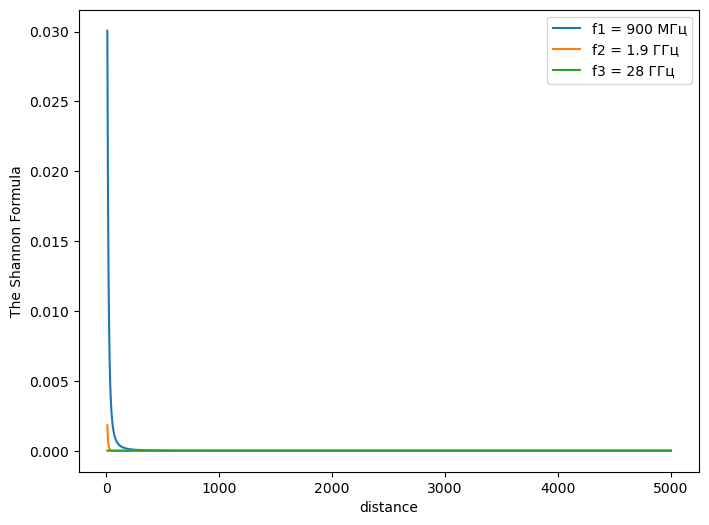

In [161]:
pwr_900, snr_900 = prd(G_r, G_t, P_t, d_uma, f[0], N_0, B, loss=uma_nlos, h_bs=h_bs_uma, h_ut=h_ut_uma)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d_uma, f[1], N_0, B, loss=uma_nlos, h_bs=h_bs_uma, h_ut=h_ut_uma)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d_uma, f[2], N_0, B, loss=uma_nlos, h_bs=h_bs_uma, h_ut=h_ut_uma)

shennond_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(d_uma, shennon_900, label='f1 = 900 МГц')
plt.plot(d_uma, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(d_uma, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('distance')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()

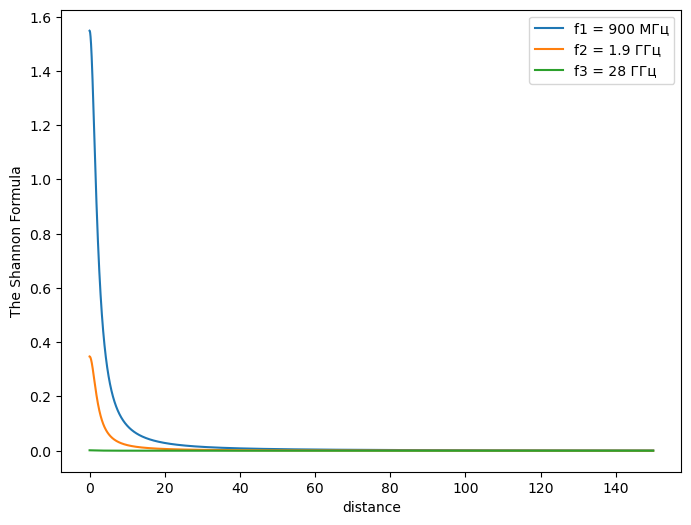

In [162]:
pwr_900, snr_900 = prd(G_r, G_t, P_t, d_inh, f[0], N_0, B, loss=inh_los, h_bs=h_bs_inh, h_ut=h_ut_inh)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d_inh, f[1], N_0, B, loss=inh_los, h_bs=h_bs_inh, h_ut=h_ut_inh)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d_inh, f[2], N_0, B, loss=inh_los, h_bs=h_bs_inh, h_ut=h_ut_inh)

shennon_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(d_inh, shennon_900, label='f1 = 900 МГц')
plt.plot(d_inh, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(d_inh, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('distance')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()

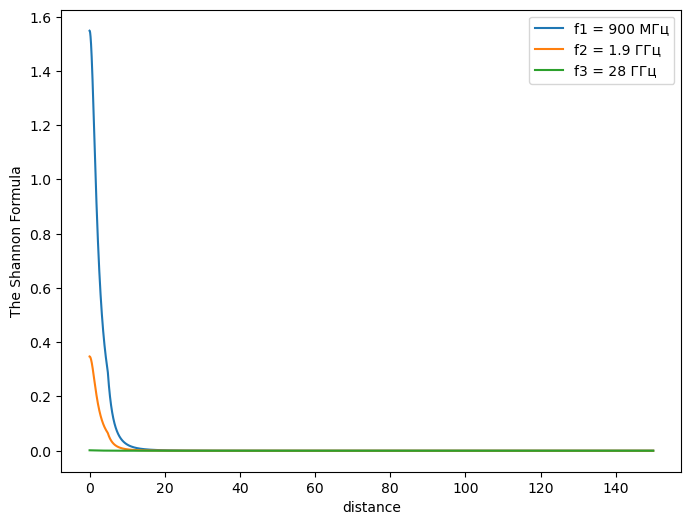

In [163]:
pwr_900, snr_900 = prd(G_r, G_t, P_t, d_inh, f[0], N_0, B, loss=inh_nlos, h_bs=h_bs_inh, h_ut=h_ut_inh)
pwr_1900, snr_1900 = prd(G_r, G_t, P_t, d_inh, f[1], N_0, B, loss=inh_nlos, h_bs=h_bs_inh, h_ut=h_ut_inh)
pwr_28000, snr_28000 = prd(G_r, G_t, P_t, d_inh, f[2], N_0, B, loss=inh_nlos, h_bs=h_bs_inh, h_ut=h_ut_inh)

shennon_900 = shennon(lin(snr_900), B)
shennon_1900 = shennon(lin(snr_1900), B)
shennon_28000 = shennon(lin(snr_28000), B)

plt.figure(figsize=(8,6))
plt.plot(d_inh, shennon_900, label='f1 = 900 МГц')
plt.plot(d_inh, shennon_1900, label='f2 = 1.9 ГГц')
plt.plot(d_inh, shennon_28000, label='f3 = 28 ГГц')
plt.xlabel('distance')
plt.ylabel('The Shannon Formula')
plt.legend()
plt.show()